In [14]:
import itertools
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas
from pandas import DataFrame

from soma.util.plot import plot_errors, plot_time

warnings.simplefilter("ignore")

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

from soma.util.errors import stat_errors_vs_sample_size
from soma.generators.eye import EyeGenerator
from soma.tests.som import som_test
from soma.tests.knn import knn_test
from soma.tests.c2st import c2s_nn_test, c2s_knn_test

In [2]:
plot_dir = os.path.expanduser('~/Plots/eye')
os.makedirs(plot_dir, exist_ok=True)

In [3]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [4]:
counts_per_label = EyeGenerator.count_per_label()
counts_per_label

{'R': 4262, 'I': 3804, 'C': 2870}

In [5]:
generators = dict(
    C=EyeGenerator('C'),
    I=EyeGenerator('I'),
    R=EyeGenerator('R'),
)

Comparing with

*A Fast and Effective Large-Scale Two-Sample Test Based on Kernels*

# p-values
As table 6, 0 is better (rejects they are equal)

In [6]:
pairwise = list(itertools.combinations(generators.keys(), 2))

In [7]:
results = DataFrame(columns=tests.keys(), index=[f'{a} vs {b}' for a, b in pairwise])
for a, b in pairwise:
    sample_size = min(counts_per_label[a], counts_per_label[b])
    for test_name, test in tests.items():
        results.loc[f'{a} vs {b}'][test_name] = test(generators[a].sample(sample_size),
                                                     generators[b].sample(sample_size))
results

,knn,som,c2st_knn,c2st_nn
C vs I,0.0,0.0,0.0,0.0
C vs R,0.0,0.0,0.0,0.0
I vs R,0.0,0.0,0.0,0.000291


# Power of the test
As table 8, higher is better

In [8]:
sample_sizes = np.array([100, 250, 500, 2500, 5000, 10000])
significance = 0.001
repeat = int(2 * (1 / significance))
repeat

2000

## I vs C

In [9]:
#ic_results = stat_errors_vs_sample_size(generators['I'], generators['C'], tests, sample_sizes, alpha=significance, repeat=repeat)
#ic_results.to_csv(os.path.join(plot_dir, 'ic_results.csv'))
ic_results = pandas.read_csv('../../results/sample_size/ic_results.csv', index_col=[0, 1])

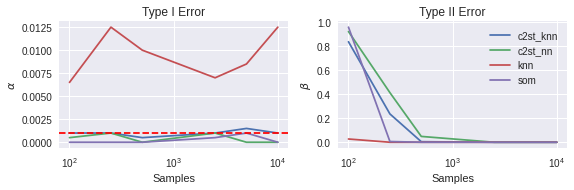

In [11]:
ic_results_fig = plot_errors(ic_results, alpha=significance, logscale=True)
ic_results_fig.savefig(os.path.join(plot_dir, 'ic_results.eps'))

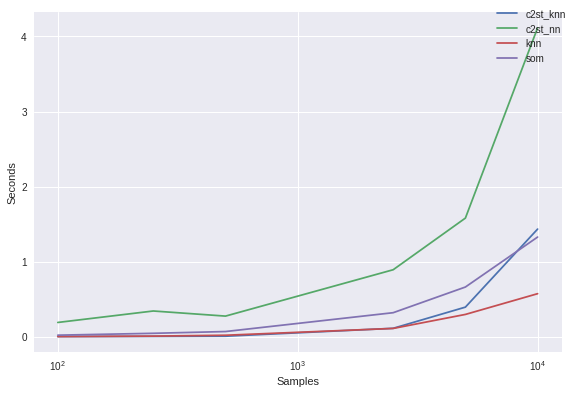

In [15]:
ic_time = plot_time(ic_results, logscale=True)
ic_time.savefig(os.path.join(plot_dir, 'ic_time.eps'))

## I vs R

In [12]:
#ir_results = stat_errors_vs_sample_size(generators['I'], generators['R'], tests, sample_sizes, alpha=significance, repeat=repeat)
#ir_results.to_csv('../../results/sample_size/ir_results.csv')
ir_results = pandas.read_csv('../../results/sample_size/ir_results.csv', index_col=[0, 1])

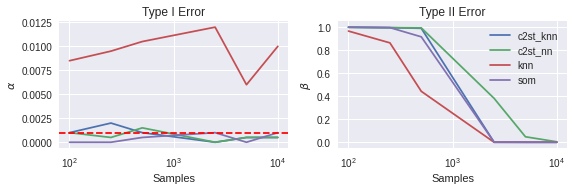

In [13]:
ir_results_fig = plot_errors(ir_results, alpha=significance, logscale=True)
ir_results_fig.savefig(os.path.join(plot_dir, 'ir_results.eps'))

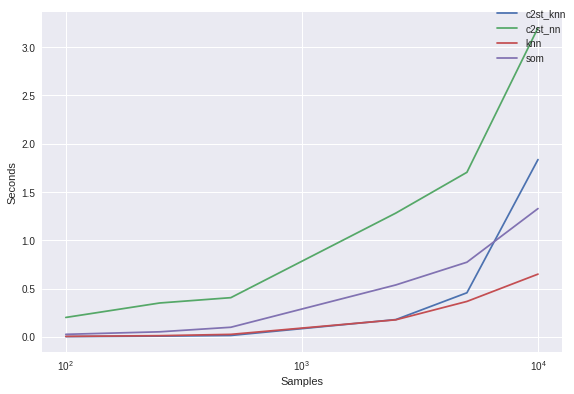

In [16]:
ir_time = plot_time(ir_results, logscale=True)
ir_time.savefig(os.path.join(plot_dir, 'ir_time.eps'))

## R vs C

In [17]:
#rc_results = stat_errors_vs_sample_size(generators['R'], generators['C'], tests, sample_sizes, alpha=significance, repeat=repeat)
#rc_results.to_csv(os.path.join(plot_dir, 'rc_results.csv'))
rc_results = pandas.read_csv('../../results/sample_size/rc_results.csv', index_col=[0, 1])

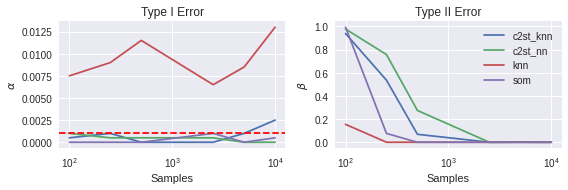

In [18]:
rc_results_fig = plot_errors(rc_results, alpha=significance, logscale=True)
rc_results_fig.savefig(os.path.join(plot_dir, 'rc_results.eps'))

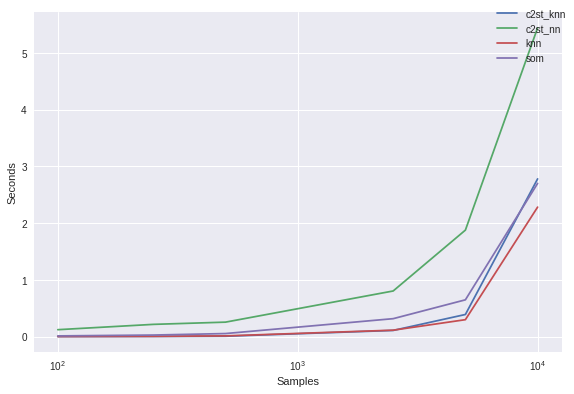

In [19]:
rc_time = plot_time(rc_results, logscale=True)
rc_time.savefig(os.path.join(plot_dir, 'rc_time.eps'))

## I vs I

Obviously this must report a low power, since it should **not** be able to reject $H_0$ (both distributions are the same!).
This is a cross-check to verify the code is working as intended.

In [20]:
ii_results = stat_errors_vs_sample_size(generators['I'], generators['I'], tests, sample_sizes, alpha=significance, repeat=10)

  0%|          | 0/24 [00:00<?, ?it/s]

In [21]:
ii_results

error1 error2      time
test     samples                        
knn      100        0.0    1.0  0.003682
         250        0.2    1.0  0.007671
         500        0.1    1.0  0.016009
         2500       0.0    1.0  0.125772
         5000       0.0    1.0  0.289544
         10000      0.0    1.0  0.438497
som      100        0.0    1.0  0.039756
         250        0.0    1.0  0.039623
         500        0.0    1.0  0.039578
         2500       0.0    1.0  0.190227
         5000       0.0    1.0  0.286133
         10000      0.0    1.0   0.57395
c2st_knn 100        0.0    1.0  0.008835
         250        0.0    1.0  0.008131
         500        0.0    1.0   0.01338
         2500       0.0    1.0  0.102965
         5000       0.1    1.0  0.275941
         10000      0.0    1.0  0.678373
c2st_nn  100        0.0    1.0  0.141426
         250        0.0    1.0  0.167971
         500        0.0    1.0  0.257776
         2500       0.0    1.0   0.67935
         5000       0.0    1.0  1.386679
         10000      0.0    1.0  1.939293